### The Goal : This Task to identify groups of records that have similar characteristics in terms of their average daily distance traveled and the percentage of time they spend over the speed limit. This can help in understanding patterns in the data, such as identifying different driving behaviors or usage patterns.

In [1]:
"""
This code performs clustering on a dataset using the k-means algorithm.
The dataset contains information on drivers, specifically their average daily distance traveled 
and the percentage of time they spend over the speed limit. The goal is to identify groups of drivers with similar driving behaviors.

Dataset source: https://github.com/JangirSumit/kmeans-clustering/blob/master/driver-data.csv
"""
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Load the Data AND  Display  rows of the data frame

In [2]:
# Load the dataset
df = pd.read_csv('driver-data.csv')
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


## Plot the Data before Clustering

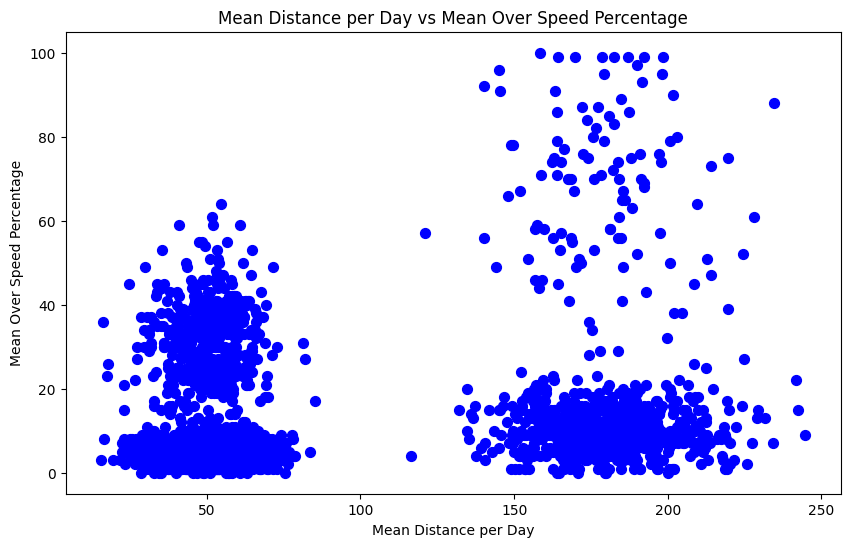

In [3]:
# Plotting the original data
plt.figure(figsize=(10, 6))
plt.scatter(df['mean_dist_day'], df['mean_over_speed_perc'], c='blue', s=50)
plt.xlabel('Mean Distance per Day')
plt.ylabel('Mean Over Speed Percentage')
plt.title('Mean Distance per Day vs Mean Over Speed Percentage')

plt.show()

# Extract the relevant features And Standardize it

In [4]:
# Extract features for clustering
X = df[['mean_dist_day', 'mean_over_speed_perc']]
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Apply K-Means Clustering

In [5]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=6, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

c:\Users\ktech\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Visualize the Clusters
#### Plot mean_dist_day vs mean_over_speed_perc with cluster coloring

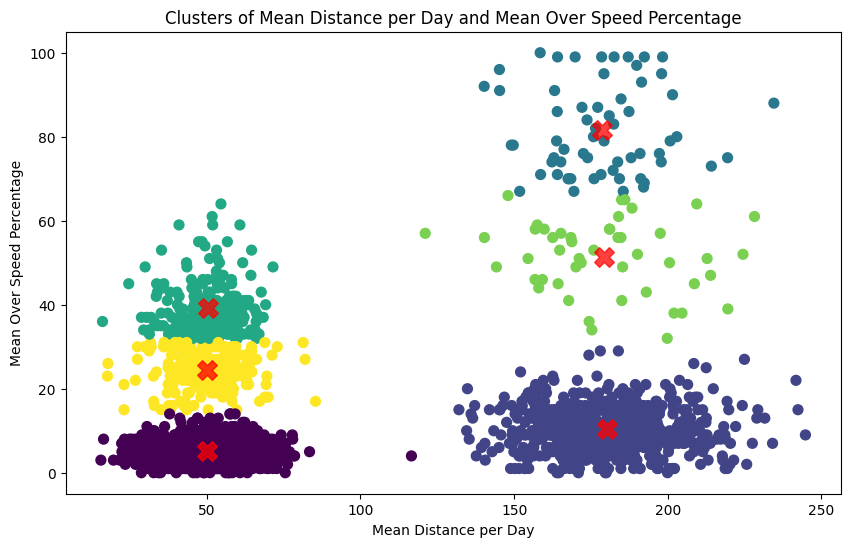

In [6]:
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['mean_dist_day'], df['mean_over_speed_perc'], c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Mean Distance per Day')
plt.ylabel('Mean Over Speed Percentage')
plt.title('Clusters of Mean Distance per Day and Mean Over Speed Percentage')
# Plot cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

# Print cluster centers

In [68]:
print("Cluster centers :")
print(centers)

Cluster centers :
[[ 50.02865601   5.11877951]
 [180.29976778  10.30624093]
 [178.45951613  81.61290323]
 [ 50.50495413  39.28440367]
 [179.29270833  51.39583333]
 [ 50.1306087   24.34782609]]


#### Interpretation of Clusters

1. **Clusters Overview**:
    - The drivers have been grouped into six clusters based on their driving behaviors, as indicated by their mean daily distance and mean over speed percentage.
    - Each cluster center represents the average behavior of the drivers within that cluster.

2. **Clusters Characteristics**:
    - **Bottom Cluster (Purple)**
        - **Mean Distance per Day**: Low
        - **Mean Over Speed Percentage**: Low
        - **Interpretation**: This cluster likely represents drivers who travel short distances daily and rarely exceed the speed limit.
    
    - **Second Bottom Cluster (Yellow)**
        - **Mean Distance per Day**: Low to Medium
        - **Mean Over Speed Percentage**: Medium
        - **Interpretation**: Drivers in this cluster travel moderate distances and have a moderate tendency to exceed speed limits.
    
    - **Third Cluster (Teal)**
        - **Mean Distance per Day**: Medium
        - **Mean Over Speed Percentage**: High
        - **Interpretation**: These drivers travel moderate distances but frequently exceed the speed limit.
    
    - **Fourth Cluster (Green)**
        - **Mean Distance per Day**: High
        - **Mean Over Speed Percentage**: Medium
        - **Interpretation**: This cluster represents drivers who travel long distances and sometimes exceed speed limits.
    
    - **Top Cluster (Blue)**
        - **Mean Distance per Day**: High
        - **Mean Over Speed Percentage**: Low
        - **Interpretation**: Drivers in this cluster travel long distances but maintain lower speeds, rarely exceeding the speed limit.
    
    - **Far Right Cluster (Light Green)**
        - **Mean Distance per Day**: Very High
        - **Mean Over Speed Percentage**: High
        - **Interpretation**: This cluster consists of drivers who travel very long distances and frequently exceed the speed limit.
